In [2]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

In [10]:
mnist.validation.num_examples

5000

Visualizing data

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
mnist.train.images[1].shape

(784,)

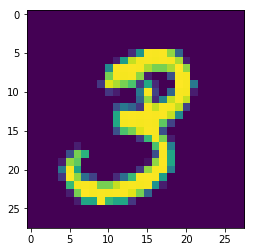

In [14]:
plt.imshow(mnist.train.images[1].reshape(28,28))

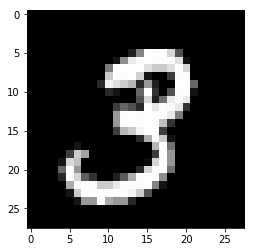

In [15]:
plt.imshow(mnist.train.images[1].reshape(28,28), cmap = 'gist_gray')

In [17]:
mnist.train.images[1].max()

1.0

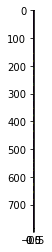

In [19]:
plt.imshow(mnist.train.images[1].reshape(784,1))

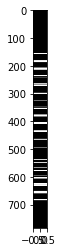

In [20]:
plt.imshow(mnist.train.images[1].reshape(784,1) ,cmap = 'gist_gray', aspect = 0.02)

# Create model

In [21]:
x = tf.placeholder(tf.float32, shape = [None,784])

In [25]:
W = tf.Variable(tf.zeros([784,10]))

In [26]:
b = tf.Variable(tf.zeros([10]))

In [27]:
#create graph
y = tf.matmul(x,W) + b

In [28]:
y_true = tf.placeholder(tf.float32, shape = [None,10])

In [29]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y_true, logits= y))

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [31]:
train = optimizer.minimize(cross_entropy)

# Create Session

In [32]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x , batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {x : batch_x, y_true:batch_y})
        
    matches = tf.equal(tf.argmax(y,1) , tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(sess.run(acc, feed_dict = {x: mnist.test.images, y_true:mnist.test.labels}))

0.9177
